# Processamento Digital de Imagens

1001527 - Turma A

Prof. Cesar Henrique Comin

## Análise experimental de complexidade da convolução espacial e por FFT

### Equipe
Igor Teixeira Machado RA: 769708
Rafael Vinícius Passador RA: 790036

## Introdução

Dada uma imagem $f$ e um filtro $w$ de tamanho $a\times b$, a correlação-cruzada para cada pixel $(x,y)$ da imagem é calculada pela fórmula

\begin{equation}
g(x,y)=\sum_{s=0}^{a}\sum_{t=0}^{b}w(s,t)f(x+s-\frac{a}{2}, y+t-\frac{b}{2})
\end{equation}

A convolução é avaliada para todos os valores das variáveis de deslocamento x e y de modo que o centro de w visite cada pixel em f, que supõe-se ter sido preenchido. Analogamente, utiliza-se a mesma equação para calcular a convolução entre um filtro e um sinal.


A FFT y(k) de comprimento $N$ da $N-ésima$ sequência de x(n) é definida como

\begin{equation}
y(k) = \sum_{n=0}^{N-1} e^{-2 \pi j \frac{k n}{N} } x(n) 
\end{equation}

e sua inversa é definida como

\begin{equation}
x(n) = \frac{1}{N} \sum_{k=0}^{N-1} e^{2 \pi j \frac{k n}{N} } y(k)
\end{equation}

A partir dessas equações, utiliza-se as funções de implementação da biblioteca scipy.fft, a qual aplica as equações supracitadas de convolução e FFT.

## Instalações Necessárias

* pip install numpy
* python -m pip install -U matplotlib
* pip install scipy

## Implementação

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft2, ifft2, fftfreq, fftshift
import timeit
import random
import os

In [23]:
def random_matrix(n,m):
    matrix = np.zeros((n,m))

    for i in range(n):
        for j in range(m):
            matrix[i][j] = random.randint(0, 255)

    return matrix

def filtroTransform(filtro, img):

    filtro = filtro/filtro.sum()

    num_rows, num_cols = img.shape
    img_padded = np.pad(img, ((0, num_rows), (0, num_cols)), mode='constant', constant_values = 0)
    filt_image = np.zeros([2 * num_rows, 2 * num_cols])
    filt_image[num_rows - 3:num_rows + 4, num_cols - 3:num_cols + 4] = filtro

    filt_image = fftshift(filt_image)
    Ffilt = fft2(filt_image)
    freq_r = fftfreq(2 * num_rows)
    freq_c = fftfreq(2 * num_cols)

    Ffilt = fftshift(Ffilt)
    freq_r = fftshift(freq_r)
    freq_c = fftshift(freq_c)

    return Ffilt, freq_r, freq_c

def testeTempoExecucao(sinal, filtro, numeroExecucoes):

    #filtro, _, _ = filtroTransform(filtro, sinal)
    convolveDirect = np.zeros(sinal.shape, dtype=np.uint16)
    convolveFFT = np.zeros(sinal.shape, dtype=np.uint16)
    convolveDirect_time = timeit.timeit(convolveDirect := lambda : (signal.convolve(sinal, filtro, method='direct')), number = numeroExecucoes)
    convolveFFT_time = timeit.timeit(convolveFFT := lambda : (signal.convolve(sinal, filtro, method='fft')), number = numeroExecucoes)
    print("Tempo do método direto: %f" % convolveDirect_time + " Tamanho do sinal: " + str(sinal.shape) + " Tamanho do filtro: " + str(filtro.shape))
    print("Tempo do método FFT: %f" % convolveFFT_time + " Tamanho do sinal: " + str(sinal.shape) + " Tamanho do filtro: " + str(filtro.shape))
    compararTempoMetodos(convolveDirect_time, convolveFFT_time)

    return convolveDirect, convolveFFT

def compararTempoMetodos(timeDirect, timeFFT):

    print("Diferença entre os tempos: " + str(abs(timeFFT - timeDirect)))

    if timeDirect < timeFFT:
        print("Método direto é mais rápido")
    else:
        print("Método FFT é mais rápido")
    pass

In [24]:
# Filtro fixo e sinal váriavel
filtro = random_matrix(5,5)
for i in range(2, 100):
    sinal = random_matrix(i, i)
    testeTempoExecucao(sinal, filtro, 10)

Tempo do método direto: 0.000584 Tamanho do sinal: (2, 2) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.003640 Tamanho do sinal: (2, 2) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.0030559999868273735
Método direto é mais rápido
Tempo do método direto: 0.000824 Tamanho do sinal: (3, 3) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.002394 Tamanho do sinal: (3, 3) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.0015696999907959253
Método direto é mais rápido
Tempo do método direto: 0.000457 Tamanho do sinal: (4, 4) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.001844 Tamanho do sinal: (4, 4) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.0013873999996576458
Método direto é mais rápido
Tempo do método direto: 0.000783 Tamanho do sinal: (5, 5) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.002534 Tamanho do sinal: (5, 5) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.0017517000087536871
Método direto é mais rápido
Tempo do método direto: 0.001453

In [25]:
# sinal fixo e filtro variável
sinal = random_matrix(50, 50)
for i in range(2, 10):
    filtro = random_matrix(i, i)
    testeTempoExecucao(sinal, filtro, 10)

Tempo do método direto: 0.010987 Tamanho do sinal: (50, 50) Tamanho do filtro: (2, 2)
Tempo do método FFT: 0.005583 Tamanho do sinal: (50, 50) Tamanho do filtro: (2, 2)
Diferença entre os tempos: 0.005403999995905906
Método FFT é mais rápido
Tempo do método direto: 0.019031 Tamanho do sinal: (50, 50) Tamanho do filtro: (3, 3)
Tempo do método FFT: 0.009367 Tamanho do sinal: (50, 50) Tamanho do filtro: (3, 3)
Diferença entre os tempos: 0.00966379999590572
Método FFT é mais rápido
Tempo do método direto: 0.033025 Tamanho do sinal: (50, 50) Tamanho do filtro: (4, 4)
Tempo do método FFT: 0.004645 Tamanho do sinal: (50, 50) Tamanho do filtro: (4, 4)
Diferença entre os tempos: 0.028380599993397482
Método FFT é mais rápido
Tempo do método direto: 0.043038 Tamanho do sinal: (50, 50) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.009715 Tamanho do sinal: (50, 50) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 0.03332300001056865
Método FFT é mais rápido
Tempo do método direto: 0.055616 T

(378, 400)
Tempo do método direto: 0.323396 Tamanho do sinal: (378, 400) Tamanho do filtro: (2, 2)
Tempo do método FFT: 0.162828 Tamanho do sinal: (378, 400) Tamanho do filtro: (2, 2)
Diferença entre os tempos: 0.16056800000660587
Método FFT é mais rápido
Tempo do método direto: 0.851084 Tamanho do sinal: (378, 400) Tamanho do filtro: (3, 3)
Tempo do método FFT: 0.218394 Tamanho do sinal: (378, 400) Tamanho do filtro: (3, 3)
Diferença entre os tempos: 0.6326894999947399
Método FFT é mais rápido
Tempo do método direto: 1.143950 Tamanho do sinal: (378, 400) Tamanho do filtro: (4, 4)
Tempo do método FFT: 0.353672 Tamanho do sinal: (378, 400) Tamanho do filtro: (4, 4)
Diferença entre os tempos: 0.7902778999850852
Método FFT é mais rápido
Tempo do método direto: 1.573267 Tamanho do sinal: (378, 400) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.160787 Tamanho do sinal: (378, 400) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 1.4124800999998115
Método FFT é mais rápido
Tempo do mét

C:\Users\iteix\AppData\Local\Temp\ipykernel_15664\2681792541.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Tempo do método direto: 7.581055 Tamanho do sinal: (378, 400) Tamanho do filtro: (12, 12)
Tempo do método FFT: 0.196531 Tamanho do sinal: (378, 400) Tamanho do filtro: (12, 12)
Diferença entre os tempos: 7.384524599998258
Método FFT é mais rápido
Tempo do método direto: 8.925803 Tamanho do sinal: (378, 400) Tamanho do filtro: (13, 13)
Tempo do método FFT: 0.258830 Tamanho do sinal: (378, 400) Tamanho do filtro: (13, 13)
Diferença entre os tempos: 8.666972700011684
Método FFT é mais rápido
Tempo do método direto: 12.290387 Tamanho do sinal: (378, 400) Tamanho do filtro: (14, 14)
Tempo do método FFT: 0.199493 Tamanho do sinal: (378, 400) Tamanho do filtro: (14, 14)
Diferença entre os tempos: 12.090893100001267
Método FFT é mais rápido


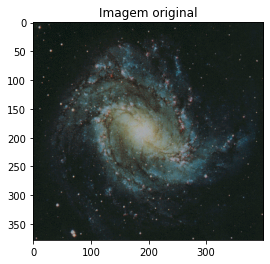

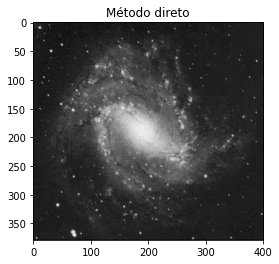

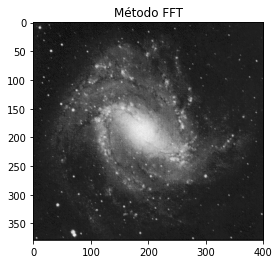

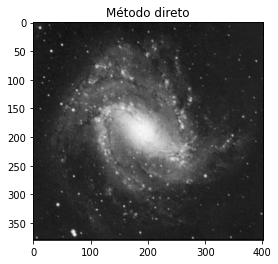

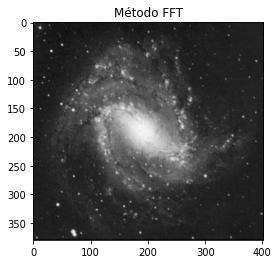

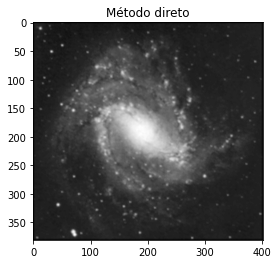

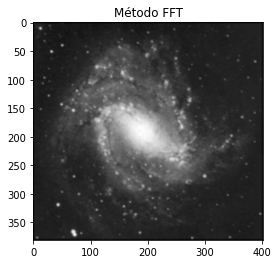

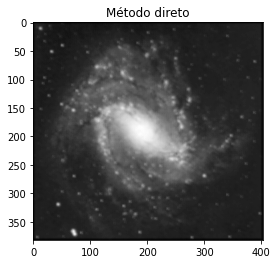

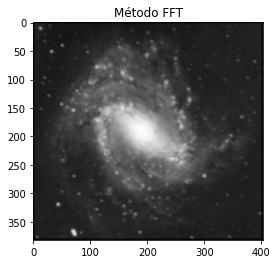

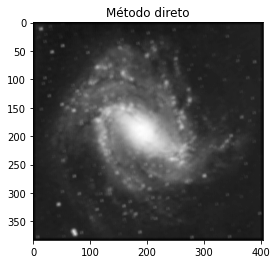

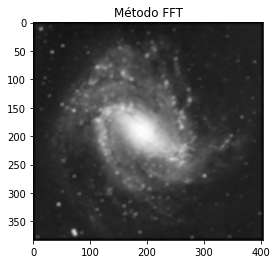

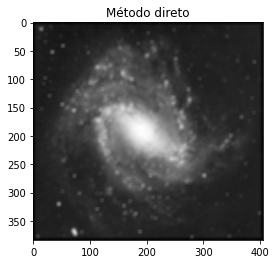

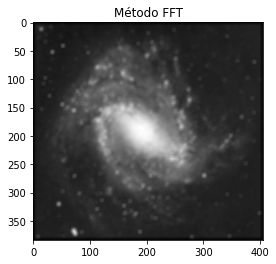

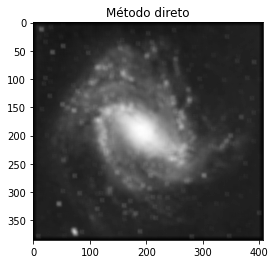

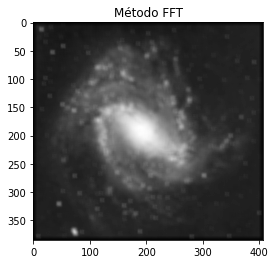

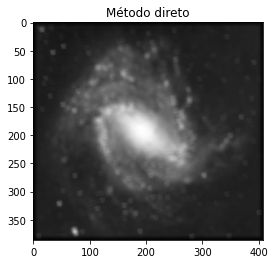

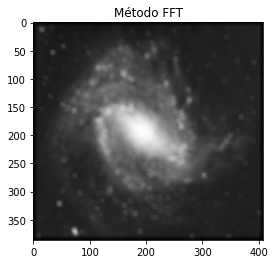

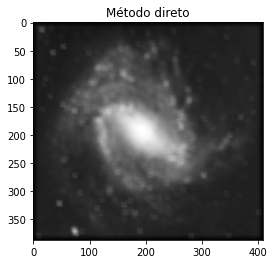

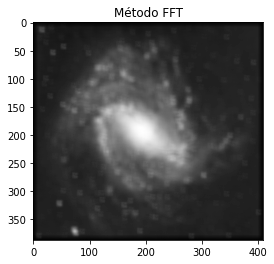

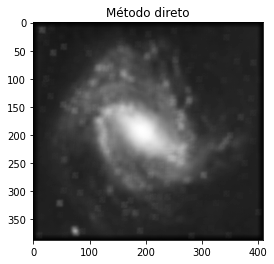

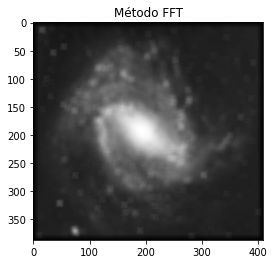

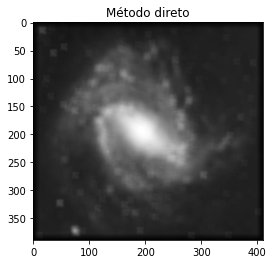

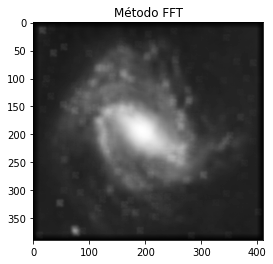

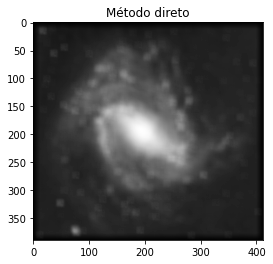

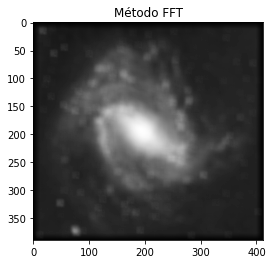

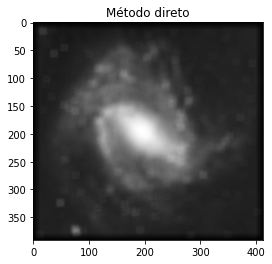

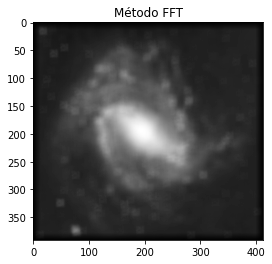

In [26]:
# imagem fixa e filtro variável
img = plt.imread('Fotos/m83.tif')
plt.figure()
plt.imshow(img, cmap='gray')
plt.title("Imagem original")
img = img[:,:,0]
print(img.shape)
for i in range(2, 15):
    filtro = random_matrix(i, i)
    imgDirect, imgFFT = testeTempoExecucao(img, filtro, 10)
    plt.figure()
    plt.imshow(imgDirect(), cmap='gray')
    plt.title("Método direto")
    plt.figure()
    plt.imshow(imgFFT(), cmap='gray')
    plt.title("Método FFT")

Tempo do método direto: 3.263979 Tamanho do sinal: (640, 480) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.370087 Tamanho do sinal: (640, 480) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 2.8938920000073267
Método FFT é mais rápido
Tempo do método direto: 1.471793 Tamanho do sinal: (378, 400) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.175465 Tamanho do sinal: (378, 400) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 1.296327799995197
Método FFT é mais rápido
Tempo do método direto: 1.818576 Tamanho do sinal: (537, 358) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.236458 Tamanho do sinal: (537, 358) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 1.582118199992692
Método FFT é mais rápido
Tempo do método direto: 3.434381 Tamanho do sinal: (480, 640) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.475495 Tamanho do sinal: (480, 640) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 2.9588863999815658
Método FFT é mais rápido
Tempo do método direto: 3.

C:\Users\iteix\AppData\Local\Temp\ipykernel_15664\1705327343.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Tempo do método direto: 3.259526 Tamanho do sinal: (480, 640) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.426801 Tamanho do sinal: (480, 640) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 2.832725300002494
Método FFT é mais rápido
Tempo do método direto: 2.630538 Tamanho do sinal: (480, 640) Tamanho do filtro: (5, 5)
Tempo do método FFT: 0.331823 Tamanho do sinal: (480, 640) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 2.29871559998719
Método FFT é mais rápido
Tempo do método direto: 7.368561 Tamanho do sinal: (773, 1076) Tamanho do filtro: (5, 5)
Tempo do método FFT: 1.011319 Tamanho do sinal: (773, 1076) Tamanho do filtro: (5, 5)
Diferença entre os tempos: 6.357241899997462
Método FFT é mais rápido


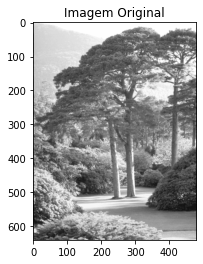

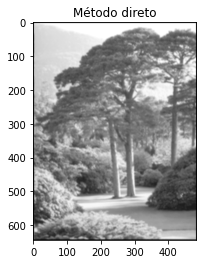

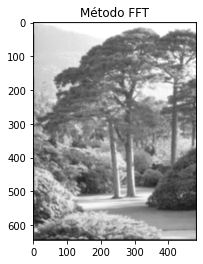

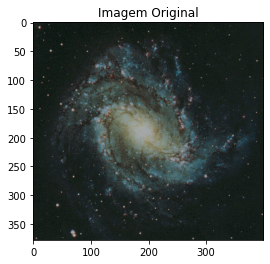

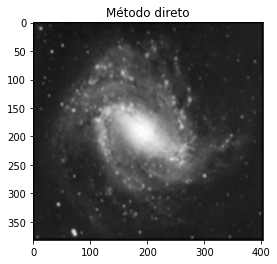

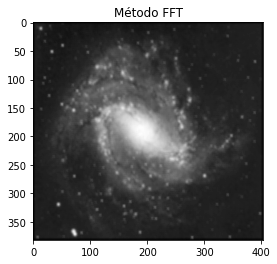

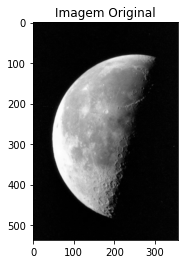

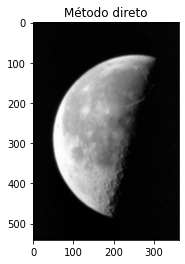

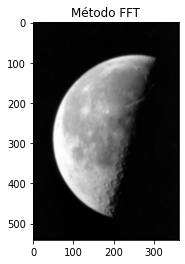

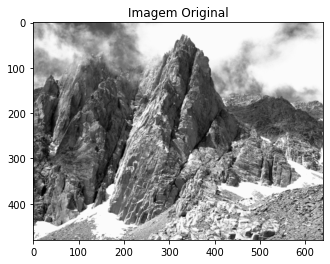

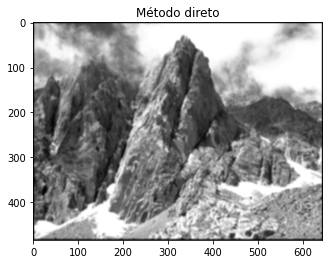

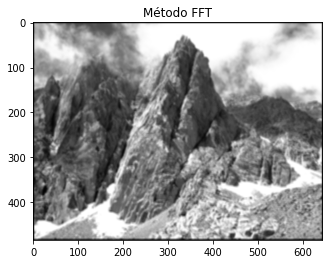

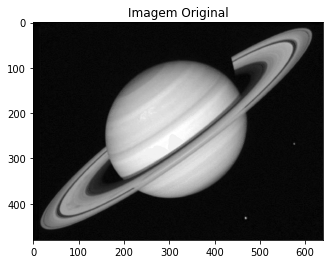

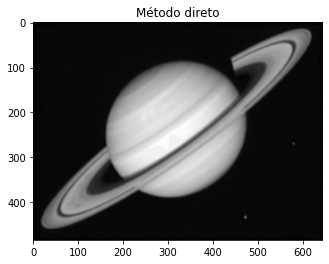

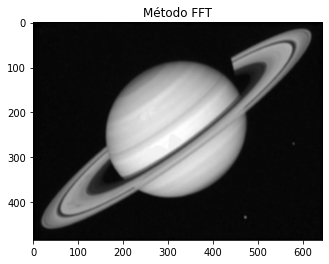

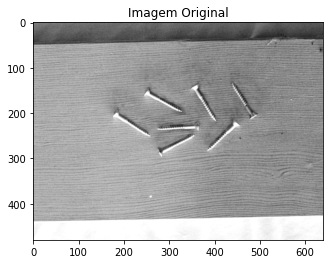

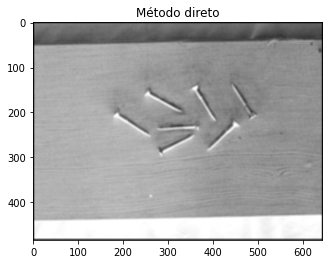

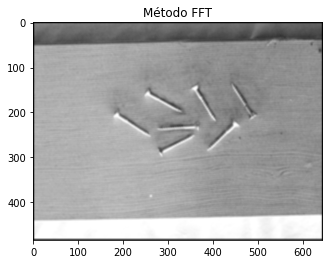

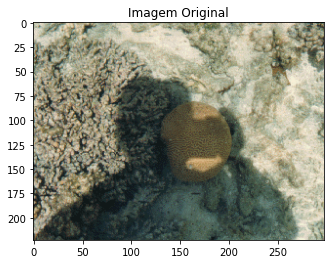

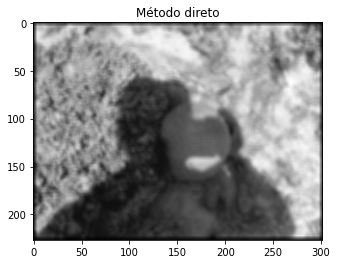

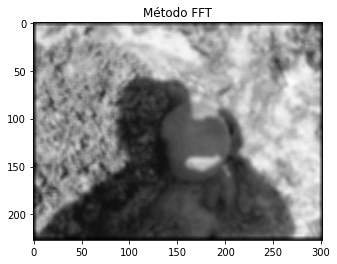

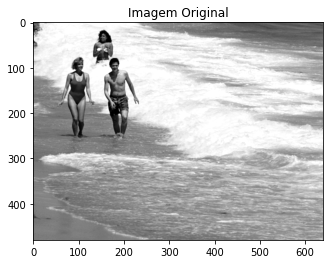

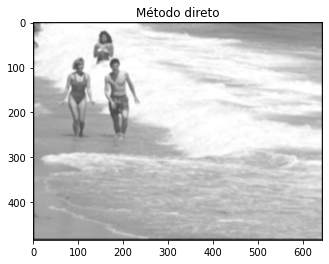

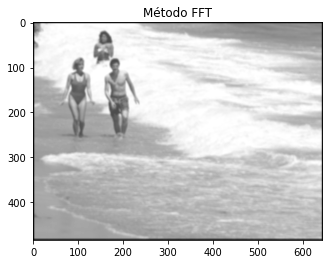

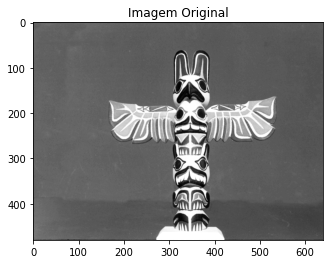

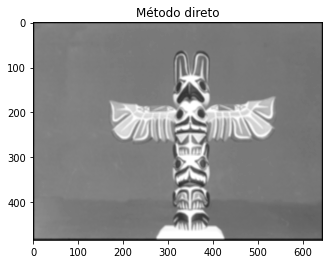

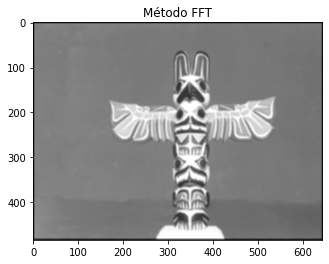

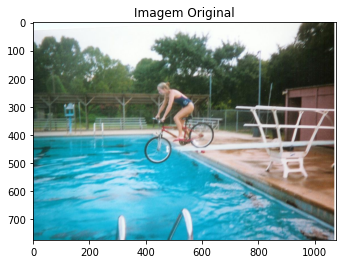

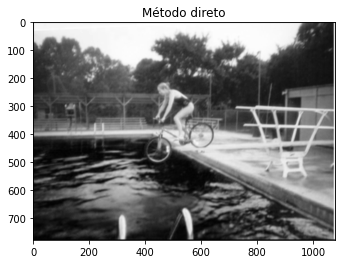

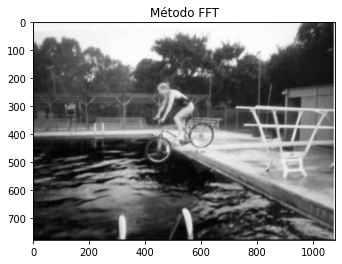

In [27]:
# imagem variável e filtro fixo
filtro = random_matrix(5,5)
for imageName in os.listdir('Fotos'):
    img = plt.imread('Fotos/' + imageName)
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title("Imagem Original")
    
    if img.ndim == 3:
        img = img[:,:,0]

    imgDirect, imgFFT = testeTempoExecucao(img, filtro, 10)
    plt.figure()
    plt.imshow(imgDirect(), cmap='gray')
    plt.title("Método direto")
    plt.figure()
    plt.imshow(imgFFT(), cmap='gray')
    plt.title("Método FFT")